# TEAM ID : PTID-CDS-DEC-23-1728

# BATCH : 14 TH AUG BATCH

# Client: Sales Effectiveness | Category: Product Sales

# Project Ref: PM-PR-0019

# Business Case:
#### FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.  
#### FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.  
#### Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. 
#### FicZon wants to explore Machine Learning to pre-categorize the lead  quality and as result, expecting significant increase in sales effectiveness.

# PROJECT GOAL:
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)

# Importing Necessary Libraries

In [1]:
pip install mysql-connector

In [2]:
import os 
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
## making connections
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!')
print(connection)

In [4]:
# getting the databse name
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [7]:
query="select * from data"

In [8]:
sales_data=pd.read_sql(query,connection)

In [9]:
data=sales_data

In [10]:
data

Created Product_ID            Source      Mobile  \
0     14-11-2018 10:05                      Website  984XXXXXXX   
1     14-11-2018 09:22                      Website     XXXXXXX   
2     14-11-2018 09:21                      Website     XXXXXXX   
3     14-11-2018 08:46                      Website     XXXXXXX   
4     14-11-2018 07:34                      Website     XXXXXXX   
...                ...        ...               ...         ...   
7417  28-04-2018 09:45          9              Call               
7418  28-04-2018 09:43         15              Call               
7419  28-04-2018 09:20          5  Live Chat-Direct               
7420  28-04-2018 08:04         21          CRM form               
7421  28-04-2018 07:54         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1                #VALUE!  Sales-Agent-10                         Mode-5   
2     dXXXXXXX@yahoo.com  Sales-Agent-10                         Mode-5   
3     wXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
4     cXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
...                  ...             ...              ...           ...   
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  
0               Open  
1               Open  
2               Open  
3               Open  
4               Open  
...              ...  
7417            LOST  
7418            LOST  
7419  Not Responding  
7420    Just Enquiry  
7421       CONVERTED  

[7422 rows x 9 columns]

# Domain Analysis

#### 1. Created - Date and time of lead generated.
#### 2. Product_ID - Product id of the each products
#### 3. Source - The channel through which a lead initially discovers the company which includes website visits, live chat platforms, referrals, campaigns, and personal contacts. 
#### 4. Mobile -Mobile phone number of the customer.
#### 5. EMAIL - EmailID of the customer.
#### 6. Sales Agent - A person or a company that acts as a sales agent on behalf of the company, introducing its products to the leads.
#### Location - Locations of the leads.
#### Delivery_Mode - Mode of the delivery according to the location.
#### Status - (The target variable) The field is typically used to communicate the status of a record to both the reporting users and the sales rep who is working the lead. The reporting user wants to see explicit detail while the sales rep wants to update the record in a natural and efficient manner.

# Basic Checks

In [11]:
data.head(5)

Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34             Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11                 Mode-5   Open  
1  Sales-Agent-10                 Mode-5   Open  
2  Sales-Agent-10                 Mode-5   Open  
3  Sales-Agent-10                 Mode-5   Open  
4  Sales-Agent-10                 Mode-5   Open

In [12]:
data.tail(5)

Created Product_ID            Source Mobile  \
7417  28-04-2018 09:45          9              Call          
7418  28-04-2018 09:43         15              Call          
7419  28-04-2018 09:20          5  Live Chat-Direct          
7420  28-04-2018 08:04         21          CRM form          
7421  28-04-2018 07:54         25           Website          

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  
7417            LOST  
7418            LOST  
7419  Not Responding  
7420    Just Enquiry  
7421       CONVERTED

In [13]:
data.shape

(7422, 9)

####  The dataset contains 7421 Rows and 9 Columns.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


####  Datatype of all the attributes in the dataset is object.

In [15]:
data.describe(include="O")

Created Product_ID Source Mobile    EMAIL    Sales_Agent  \
count               7422       7422   7422   7422     7422           7422   
unique              6752         30     26    487      883             13   
top     26-09-2018 11:30         18   Call         #VALUE!  Sales-Agent-4   
freq                   4       1711   2547   1810     1701           1500   

               Location Delivery_Mode     Status  
count              7422          7422       7422  
unique               18             5         11  
top     Other Locations        Mode-5  Junk Lead  
freq               2500          2975       1536

####  Most Freqently occured attribute values are:
- Created : 26-09-2018 11:30
- Product_ID : 18
- Source : Call
- Sales_Agent : Sales-Agent-4
- Location : Other Locations
- Delivery_Mode: Mode-5
- Status : Junk Lead

In [16]:
# Taking the unique values and value counts
for i in data:
    print(i,data[i].unique())
    print("*******************************")
    print(data[i].value_counts())
    print("__________________________________________")

Created ['14-11-2018 10:05' '14-11-2018 09:22' '14-11-2018 09:21' ...
 '28-04-2018 09:20' '28-04-2018 08:04' '28-04-2018 07:54']
*******************************
26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 12:52    1
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
28-04-2018 07:54    1
Name: Created, Length: 6752, dtype: int64
__________________________________________
Product_ID ['' '9' '19' '18' '15' '27' '5' '2' '3' '25' '10' '20' '11' '21' '1' '12'
 '13' '17' '24' '26' '16' '23' '22' '8' '14' '6' '0' '28' '7' '4']
*******************************
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        

In [17]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [18]:
data['Created']=pd.to_datetime(data['Created'])

In [19]:
data

Created Product_ID            Source      Mobile  \
0    2018-11-14 10:05:00                      Website  984XXXXXXX   
1    2018-11-14 09:22:00                      Website     XXXXXXX   
2    2018-11-14 09:21:00                      Website     XXXXXXX   
3    2018-11-14 08:46:00                      Website     XXXXXXX   
4    2018-11-14 07:34:00                      Website     XXXXXXX   
...                  ...        ...               ...         ...   
7417 2018-04-28 09:45:00          9              Call               
7418 2018-04-28 09:43:00         15              Call               
7419 2018-04-28 09:20:00          5  Live Chat-Direct               
7420 2018-04-28 08:04:00         21          CRM form               
7421 2018-04-28 07:54:00         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1                #VALUE!  Sales-Agent-10                         Mode-5   
2     dXXXXXXX@yahoo.com  Sales-Agent-10                         Mode-5   
3     wXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
4     cXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
...                  ...             ...              ...           ...   
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  
0               Open  
1               Open  
2               Open  
3               Open  
4               Open  
...              ...  
7417            LOST  
7418            LOST  
7419  Not Responding  
7420    Just Enquiry  
7421       CONVERTED  

[7422 rows x 9 columns]

In [20]:
data['Created_day']=sales_data['Created'].dt.day
data['Created_month']=sales_data['Created'].dt.month
data['Created_year']=sales_data['Created'].dt.year

In [21]:
data

Created Product_ID            Source      Mobile  \
0    2018-11-14 10:05:00                      Website  984XXXXXXX   
1    2018-11-14 09:22:00                      Website     XXXXXXX   
2    2018-11-14 09:21:00                      Website     XXXXXXX   
3    2018-11-14 08:46:00                      Website     XXXXXXX   
4    2018-11-14 07:34:00                      Website     XXXXXXX   
...                  ...        ...               ...         ...   
7417 2018-04-28 09:45:00          9              Call               
7418 2018-04-28 09:43:00         15              Call               
7419 2018-04-28 09:20:00          5  Live Chat-Direct               
7420 2018-04-28 08:04:00         21          CRM form               
7421 2018-04-28 07:54:00         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1                #VALUE!  Sales-Agent-10                         Mode-5   
2     dXXXXXXX@yahoo.com  Sales-Agent-10                         Mode-5   
3     wXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
4     cXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
...                  ...             ...              ...           ...   
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  Created_day  Created_month  Created_year  
0               Open           14             11          2018  
1               Open           14             11          2018  
2               Open           14             11          2018  
3               Open           14             11          2018  
4               Open           14             11          2018  
...              ...          ...            ...           ...  
7417            LOST           28              4          2018  
7418            LOST           28              4          2018  
7419  Not Responding           28              4          2018  
7420    Just Enquiry           28              4          2018  
7421       CONVERTED           28              4          2018  

[7422 rows x 12 columns]

In [22]:
data['Created_hour']=data['Created'].dt.hour
data['Created_minute']=data['Created'].dt.minute

In [23]:
data

Created Product_ID            Source      Mobile  \
0    2018-11-14 10:05:00                      Website  984XXXXXXX   
1    2018-11-14 09:22:00                      Website     XXXXXXX   
2    2018-11-14 09:21:00                      Website     XXXXXXX   
3    2018-11-14 08:46:00                      Website     XXXXXXX   
4    2018-11-14 07:34:00                      Website     XXXXXXX   
...                  ...        ...               ...         ...   
7417 2018-04-28 09:45:00          9              Call               
7418 2018-04-28 09:43:00         15              Call               
7419 2018-04-28 09:20:00          5  Live Chat-Direct               
7420 2018-04-28 08:04:00         21          CRM form               
7421 2018-04-28 07:54:00         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1                #VALUE!  Sales-Agent-10                         Mode-5   
2     dXXXXXXX@yahoo.com  Sales-Agent-10                         Mode-5   
3     wXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
4     cXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
...                  ...             ...              ...           ...   
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  Created_day  Created_month  Created_year  Created_hour  \
0               Open           14             11          2018            10   
1               Open           14             11          2018             9   
2               Open           14             11          2018             9   
3               Open           14             11          2018             8   
4               Open           14             11          2018             7   
...              ...          ...            ...           ...           ...   
7417            LOST           28              4          2018             9   
7418            LOST           28              4          2018             9   
7419  Not Responding           28              4          2018             9   
7420    Just Enquiry           28              4          2018             8   
7421       CONVERTED           28              4          2018             7   

      Created_minute  
0                  5  
1                 22  
2                 21  
3                 46  
4                 34  
...              ...  
7417              45  
7418              43  
7419              20  
7420               4  
7421              54  

[7422 rows x 14 columns]

# Data Preprocessing

In [24]:
# Defining 'Status' as 'High Potential' or 'Poor Potential' as per the requirements from the client
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High potential',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low potential',inplace=True)

In [25]:
data

Created Product_ID            Source      Mobile  \
0    2018-11-14 10:05:00                      Website  984XXXXXXX   
1    2018-11-14 09:22:00                      Website     XXXXXXX   
2    2018-11-14 09:21:00                      Website     XXXXXXX   
3    2018-11-14 08:46:00                      Website     XXXXXXX   
4    2018-11-14 07:34:00                      Website     XXXXXXX   
...                  ...        ...               ...         ...   
7417 2018-04-28 09:45:00          9              Call               
7418 2018-04-28 09:43:00         15              Call               
7419 2018-04-28 09:20:00          5  Live Chat-Direct               
7420 2018-04-28 08:04:00         21          CRM form               
7421 2018-04-28 07:54:00         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1                #VALUE!  Sales-Agent-10                         Mode-5   
2     dXXXXXXX@yahoo.com  Sales-Agent-10                         Mode-5   
3     wXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
4     cXXXXXXX@gmail.com  Sales-Agent-10                         Mode-5   
...                  ...             ...              ...           ...   
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  Created_day  Created_month  Created_year  Created_hour  \
0     High potential           14             11          2018            10   
1     High potential           14             11          2018             9   
2     High potential           14             11          2018             9   
3     High potential           14             11          2018             8   
4     High potential           14             11          2018             7   
...              ...          ...            ...           ...           ...   
7417   Low potential           28              4          2018             9   
7418   Low potential           28              4          2018             9   
7419   Low potential           28              4          2018             9   
7420   Low potential           28              4          2018             8   
7421  High potential           28              4          2018             7   

      Created_minute  
0                  5  
1                 22  
2                 21  
3                 46  
4                 34  
...              ...  
7417              45  
7418              43  
7419              20  
7420               4  
7421              54  

[7422 rows x 14 columns]

In [26]:
data.drop(['Mobile','EMAIL','Created'],axis=1,inplace=True)#Dropping unnecessary attributes

In [27]:
data.isnull().sum()

Product_ID        0
Source            0
Sales_Agent       0
Location          0
Delivery_Mode     0
Status            0
Created_day       0
Created_month     0
Created_year      0
Created_hour      0
Created_minute    0
dtype: int64

In [28]:
for i in data:
    print(data[i].value_counts())
    print("__________________________________________")

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64
__________________________________________
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads      

#### While checking the null values it is seen that there is no null values but while checking the unique values it is seen that there are some empty string(' ').

In [29]:
# replacing empty string with null values
data.replace('',np.nan,inplace=True)

In [30]:
data.isnull().sum()

Product_ID        58
Source            17
Sales_Agent       23
Location          58
Delivery_Mode      0
Status             0
Created_day        0
Created_month      0
Created_year       0
Created_hour       0
Created_minute     0
dtype: int64

### Handling Missing values in Location

In [31]:
data['Location'].fillna("Other Locations",inplace=True)  # # filling nan values with most frequent element

In [32]:
data.Location.value_counts()

Other Locations    2558
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [33]:
# Combining the locations outside India as Foreign_location and Howrah into Kolkalta for better analysis 
data.Location.replace(['UAE','UK', 'USA','Singapore','AUSTRALIA', 'EUROPE', 'Malaysia'],'Foreign_Locations',inplace=True)
data.Location.replace(['Howrah'],'Kolkata',inplace=True)

In [34]:
data.Location.value_counts()

Other Locations      2558
Bangalore            2084
Chennai               909
Hyderabad             528
Delhi                 471
Mumbai                402
Foreign_Locations     214
Pune                  142
Trivandrum             58
Kolkata                56
Name: Location, dtype: int64

### Handling Missing values in Sales Agent

In [35]:
# filling nan values with most frequent element
data['Sales_Agent'].fillna("Sales-Agent-4",inplace=True)


### Handling Missing values in Source

In [36]:
data['Source'].fillna("Call",inplace=True)


### Handling Missing values in Product ID

In [37]:
data['Product_ID'].fillna("18",inplace=True)

In [38]:
data.isnull().sum()

Product_ID        0
Source            0
Sales_Agent       0
Location          0
Delivery_Mode     0
Status            0
Created_day       0
Created_month     0
Created_year      0
Created_hour      0
Created_minute    0
dtype: int64

In [39]:
#Combining the sources havinh same function for easier analysis  
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.replace('By Recommendation','Customer Referral',inplace=True)
data.replace(['US Website','Just Dial'],'Website',inplace=True)
data.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [40]:
data.Source.value_counts()

Live Chat            2677
Call                 2564
Website              1787
Customer Referral     212
Existing Customer     146
Campaign               36
Name: Source, dtype: int64

# Exploratory Data Analysis


## Univariate Data Analysis

In [41]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## INSIGHTS
- Most frequently showed Product_Id is 18 which means it is high in demand and least is 14 .
- Top category from Source is call and Live Chat. and Campaign shows least impact.
- Sales-Agent-4 and Sales-Agent-11 does the most of the sales and least is done by Sales-Agent-1.
- Top category is Other location followed by Bangalore.
- Delivery_mode 5 is most choosen one by the customers and least is Mode-2.
- 61% of the  dataset have status as Low potential leads

## Bivariate Analysis

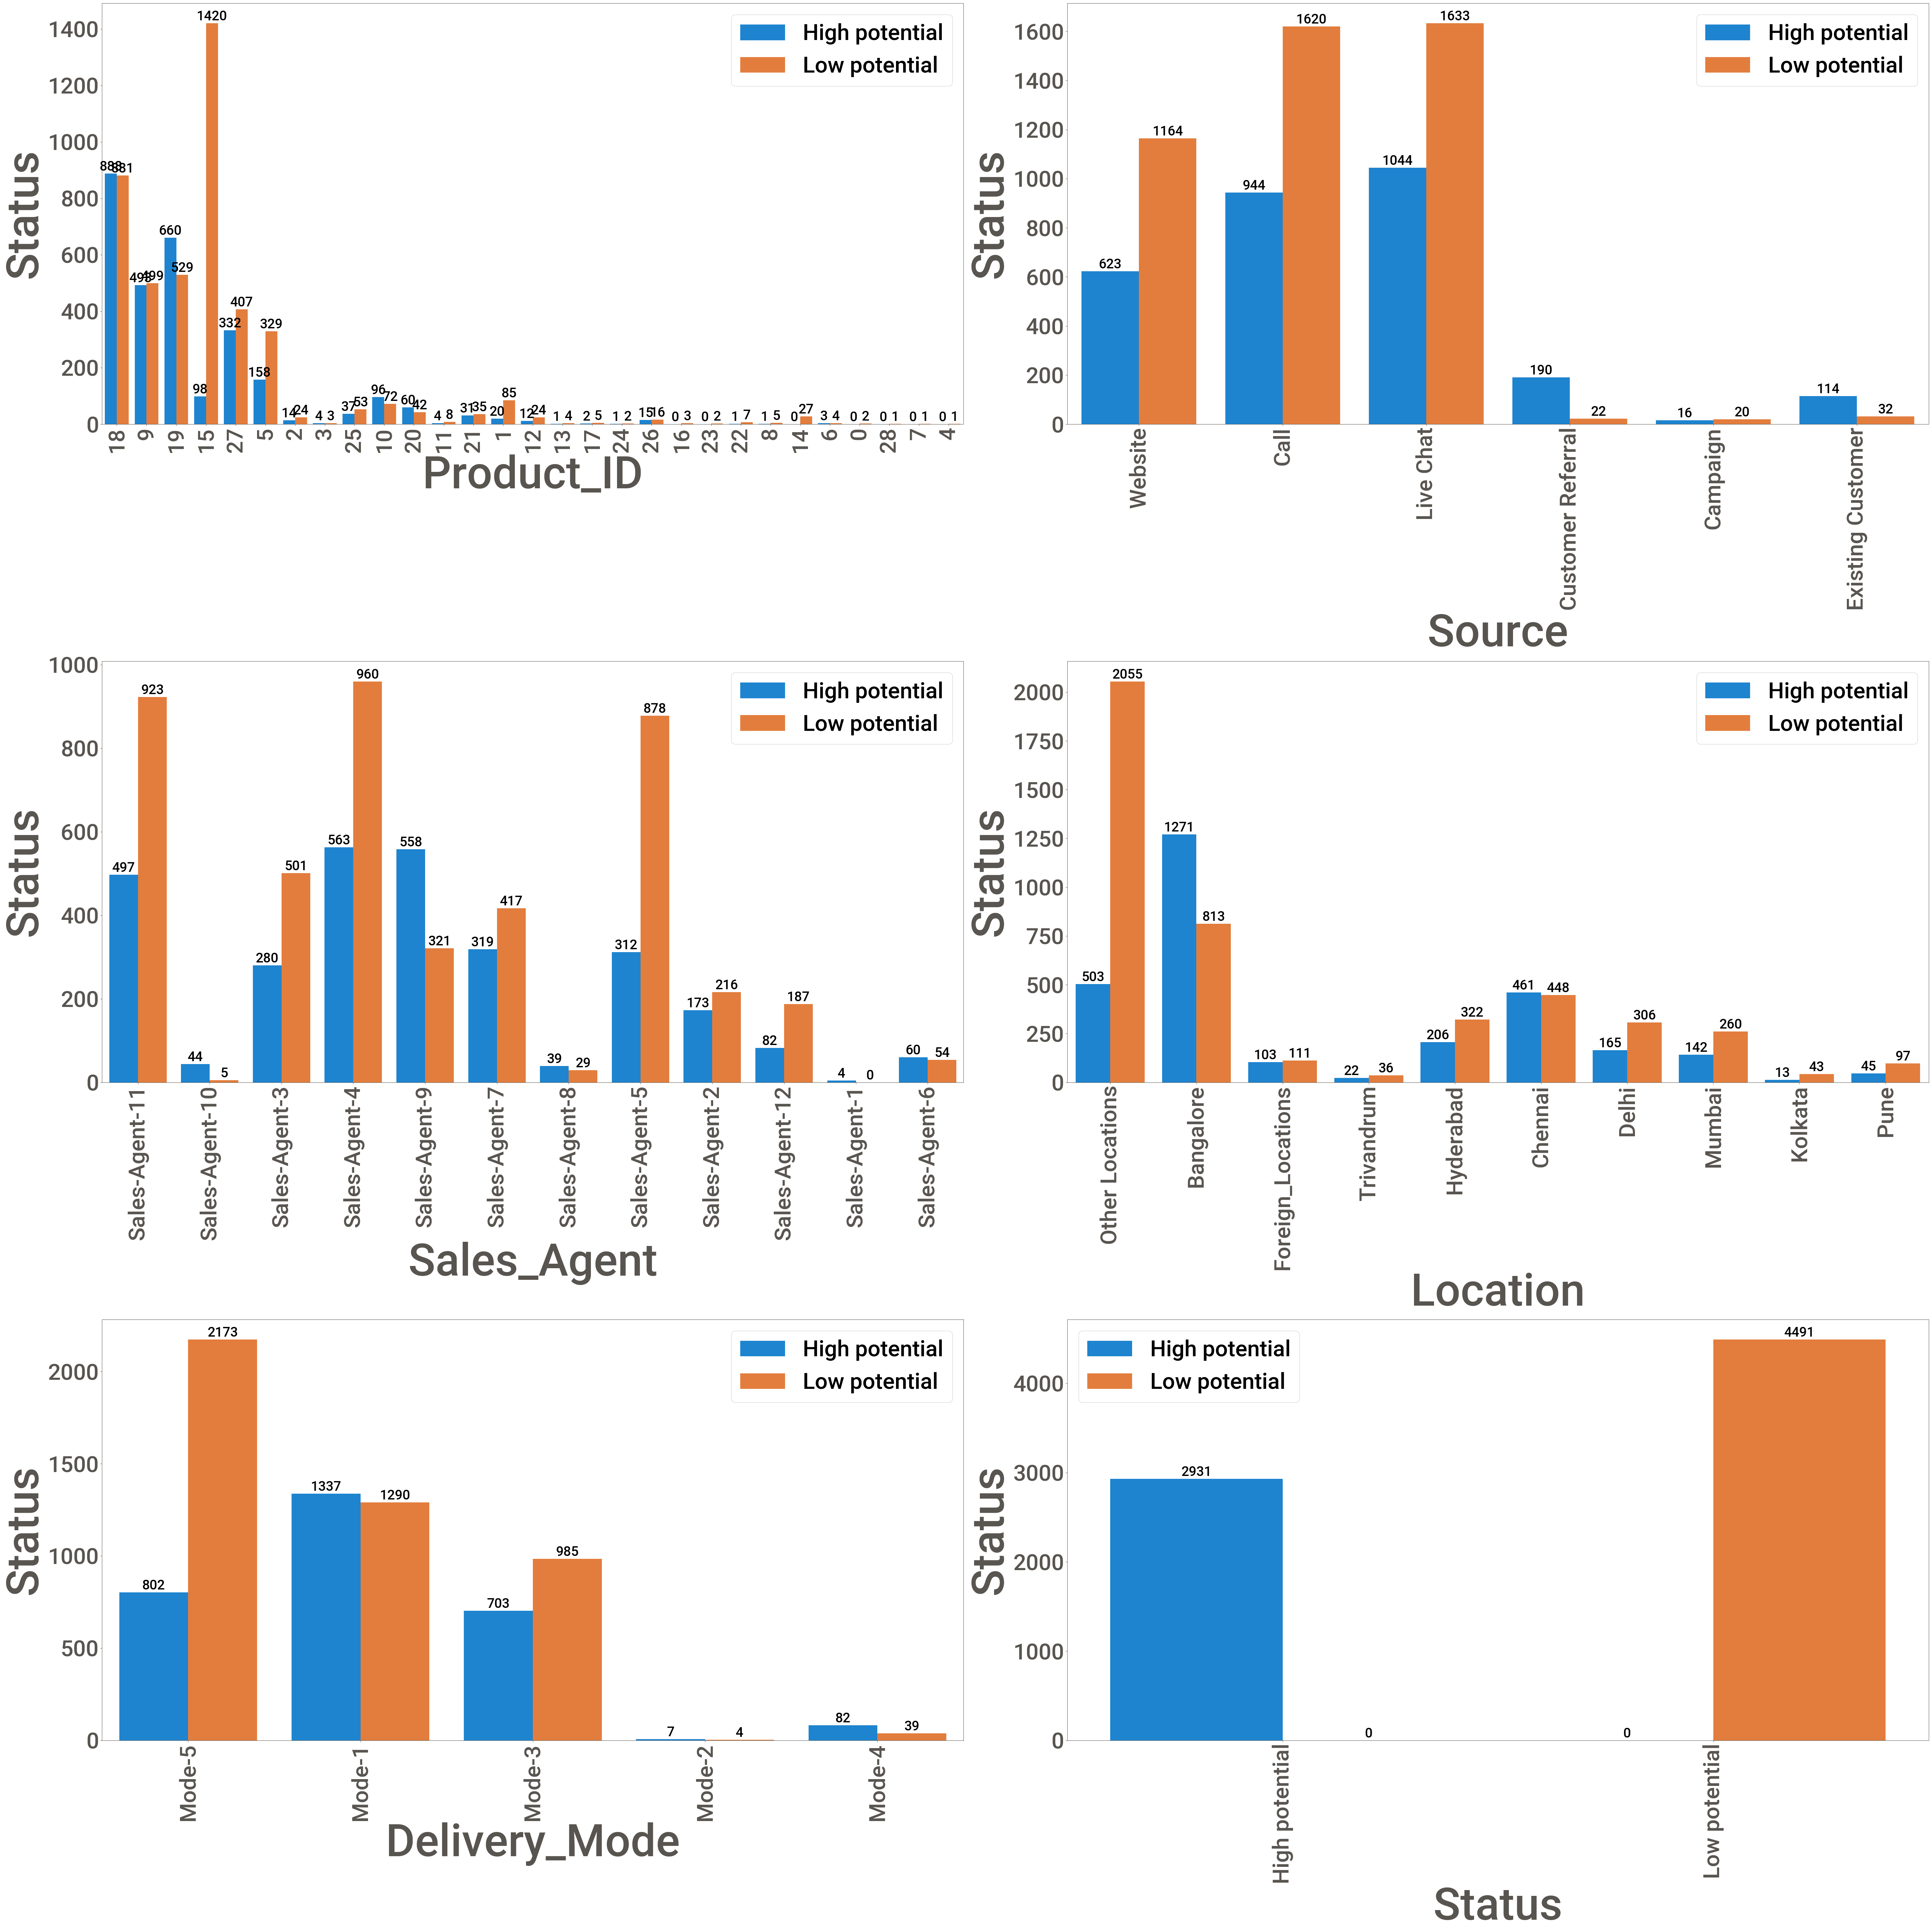

In [42]:
plt.figure(figsize=(60, 60), facecolor="white")
p = 1

for column in data:
    if p <= 6:
        ax = plt.subplot(3, 2, p)
        sns.countplot(x=data[column], hue=data["Status"])
        plt.xlabel(column, fontsize=100)
        plt.ylabel("Status", fontsize=100)
        plt.legend(fontsize=50)
        plt.xticks(fontsize=50,rotation='vertical')
        plt.yticks(fontsize=50)

        # Add values to the countplot
        for rect in ax.patches:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, f"{int(height)}", ha="center", va="bottom", fontsize=30)

    p += 1

plt.tight_layout()
plt.show()
plt.show()

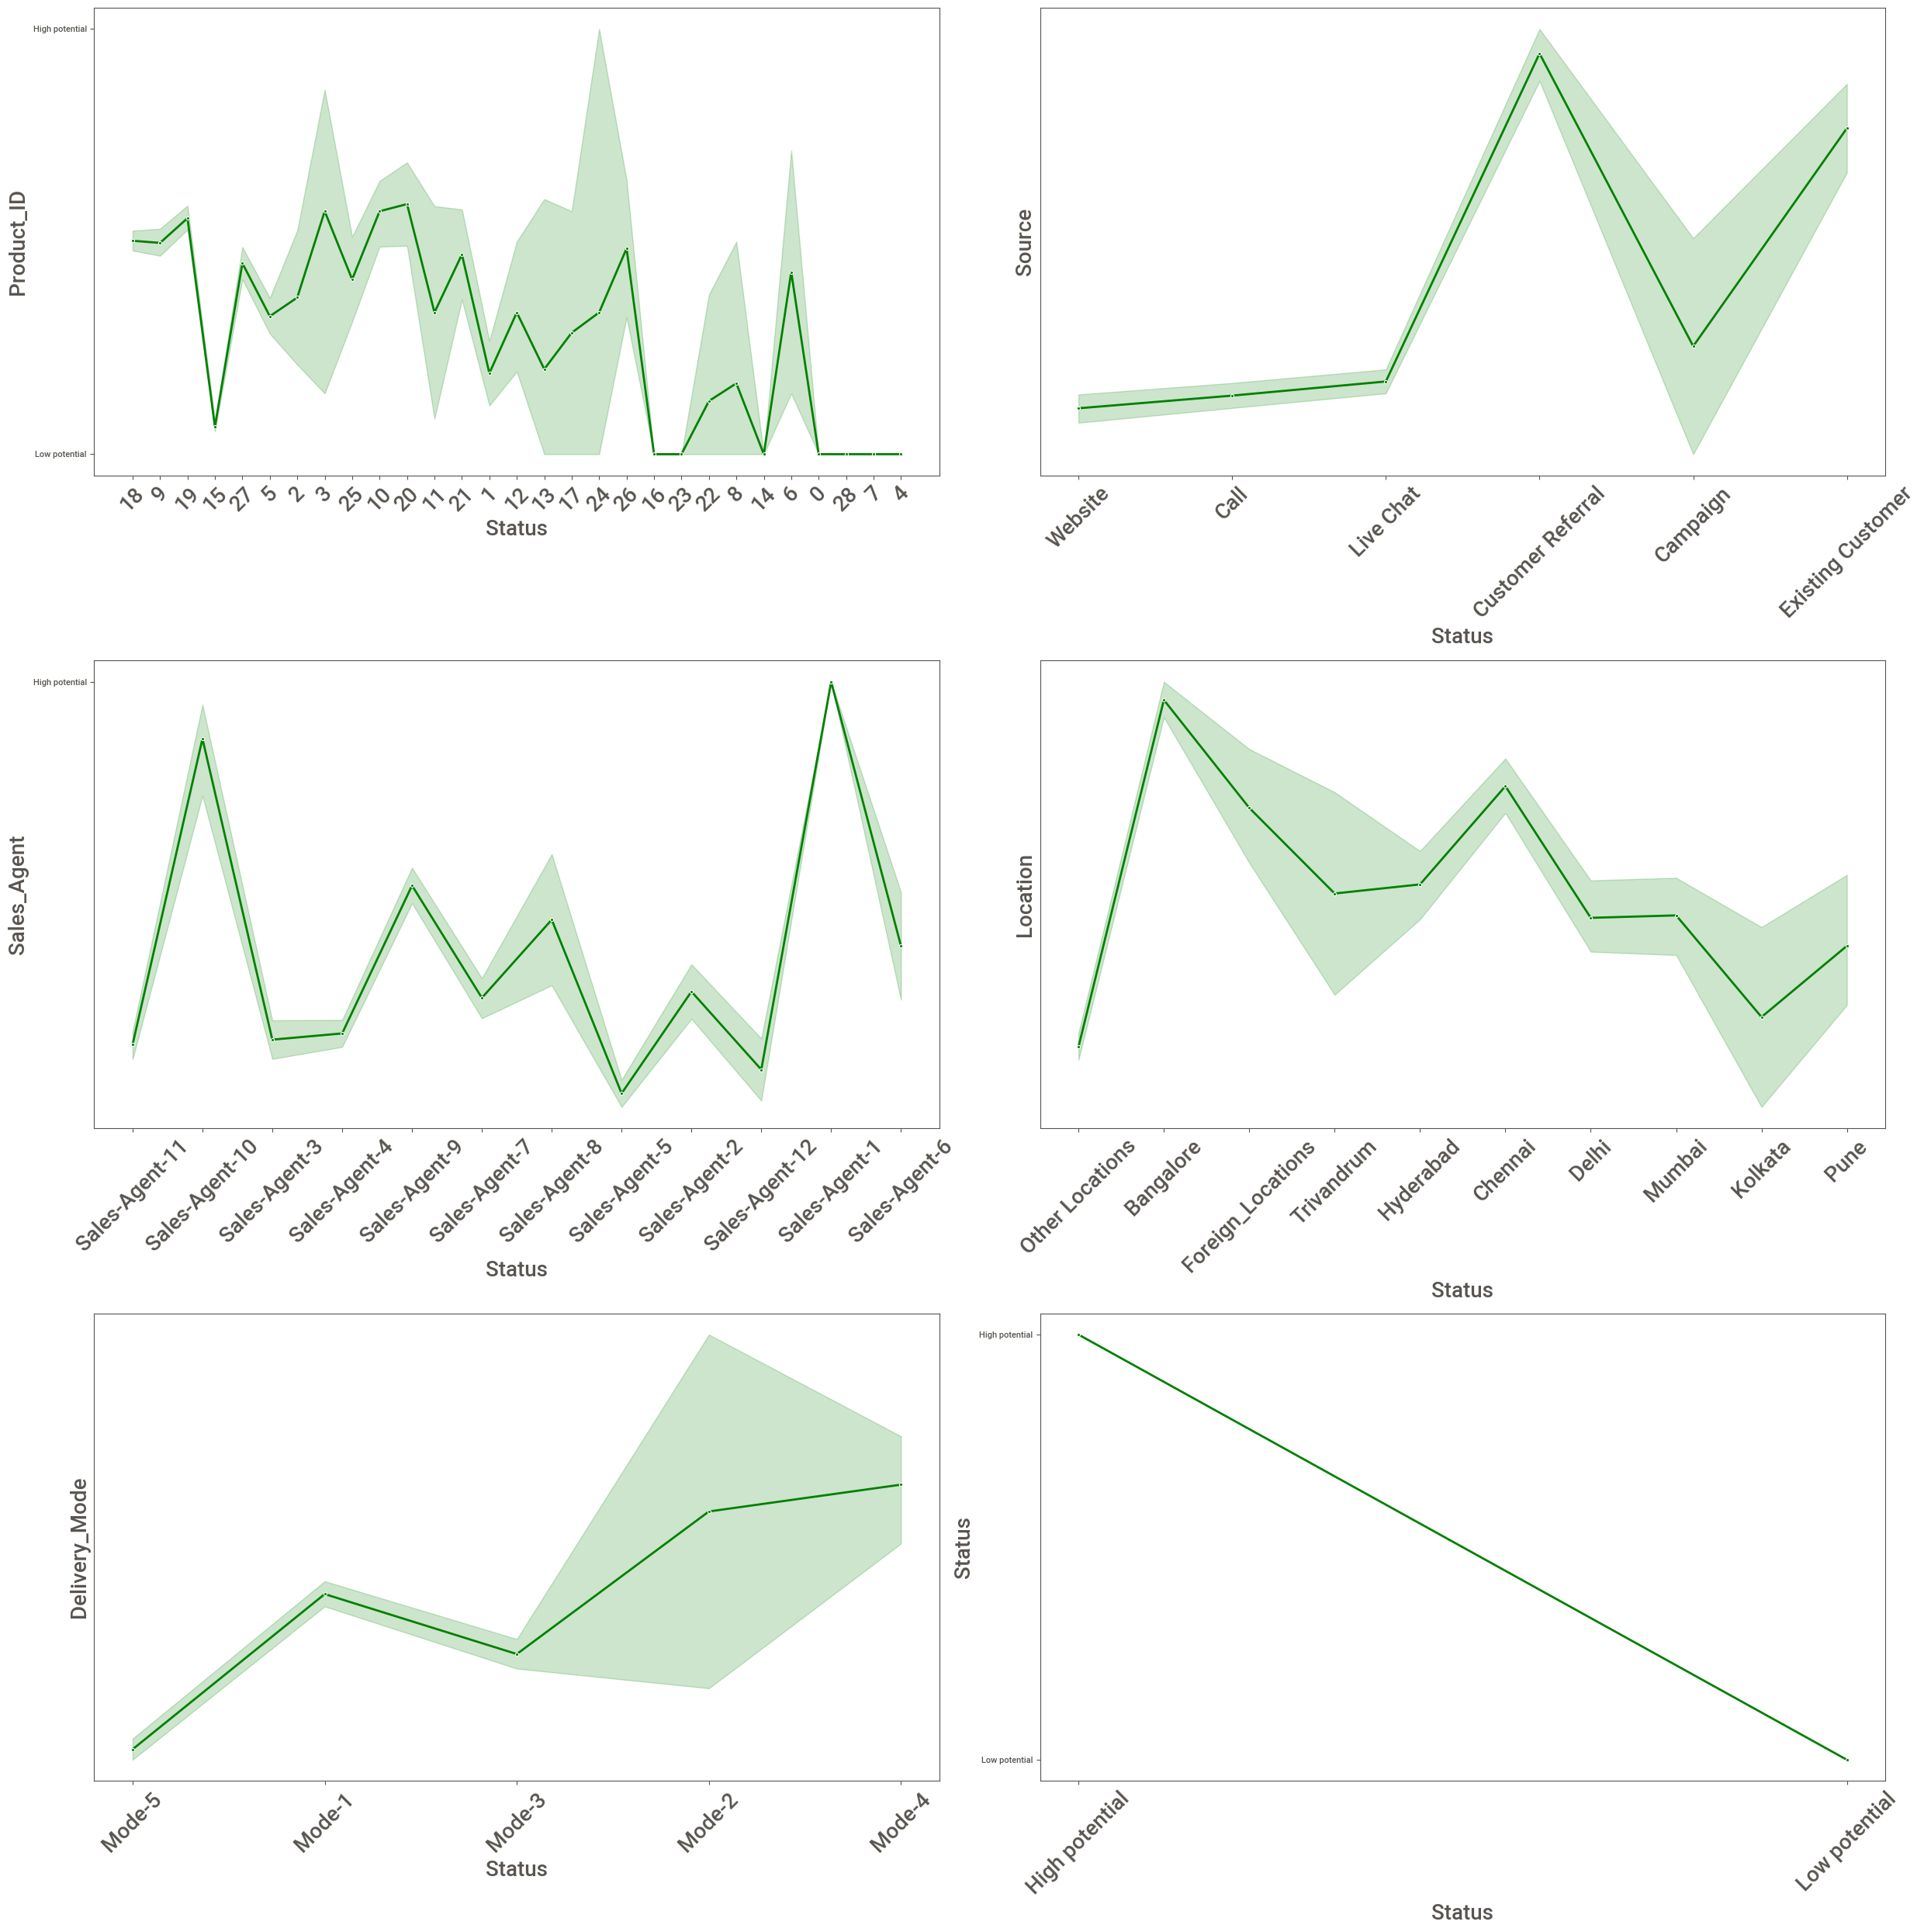

In [43]:
plt.figure(figsize=(25,25),facecolor='white')

plotnum=1

for c in data:
    if(plotnum<=6):
        ax=plt.subplot(3,2,plotnum)
        sns.lineplot(x=data[c], y='Status', data=data, color='Green', marker='o', linewidth=2)
        plt.xlabel('Status',fontsize=20)
        plt.ylabel(c,fontsize=20)    
        plt.xticks(rotation=45, fontsize=20)

    plotnum+=1

plt.tight_layout() 

## INSIGHTS
**From the graphs we can analyze that :** 
- **Product_id 15** having more number of non-potential lead 
- **Product_id 18** with more number of High potential status.
- Most of the potential customers are coming from **live chat and calls**, followed by the website as a source. However, we are also encountering a significant number of non-potential leads from these sources.
- Sales_Agent 4,5 and 11 provides maximum no. of lead but most of them are Nonpotential.
- **Sales_Agent 9** providing good potential lead.
- **Delivery mode 5** yields the highest number of leads, but a majority of them are non-potential customers. 
- On the other hand, **Delivery modes 1 and 4** provide the most potential leads, but mode 4 having fewer deliveries in comparison.
- All the sales based on other countires and in India **Bangalore** is having the **high potential** lead followed by Chennai and least in Kolkalta.

## Sales Potential Across the World

In [44]:
import plotly.express as px
import pandas as pd

# Sample data (replace this with your actual data)
data1= {
    'Location': ['UAE','UK', 'USA','Singapore','AUSTRALIA', 'EUROPE', 'Malaysia','Other Locations', 'Trivandrum', 'Hyderabad', 'Chennai', 'Delhi', 'Mumbai', 'Kolkata', 'Pune', 'Howrah','Bangalore'],
    'Status': ['Low Potential', 'Low Potential', 'Low Potential', 'High Potential', 'Low Potential', 'High Potential', 'High Potential', 'Low Potential', 'Low Potential', 'Low Potential', 'High Potential', 'Low Potential', 'Low Potential', 'Low Potential', 'Low Potential', 'Low Potential','High Potential'],
    'Latitude': [23.4241, 51.5074, 37.0902, 1.3521, -25.2744, 54.5260, 4.2105, None, 8.5241, 17.3850, 13.0827, 28.7041, 19.0760, 22.5726, 18.5204, 22.5958,12.9716],  # Latitude coordinates
    'Longitude': [53.8478, -0.1278, -95.7129, 103.8198, 133.7751, 15.2551, 101.9758, None, 76.9366, 78.4867, 80.2707, 77.1025, 72.8777, 88.3639, 73.8567, 88.2636,77.5946]  # Longitude coordinates
}

df = pd.DataFrame(data1)

# Create the scattermapbox plot
map_fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Location",
    color="Status",
    color_discrete_map={'High Potential': 'green', 'Low Potential': 'red'},  # Set colors for each status
    labels={'Status': 'Potential'},  # Optional label for the color legend
    zoom=0,  # Adjust zoom level
)

# Update the layout
map_fig.update_layout(
    title_text='Sales Potential by Location',
    mapbox_style="carto-positron",  # Choose mapbox style
)

map_fig.show()

**The map shows the High potential leads and Low potential lead across the world and it is seen that only Bangalore and Chennai shows high potential leads and taking Foreign countries Malaysia,Singapore,Europe shows high potential leads.**

# Data Encoding

In [45]:
data ['Product_ID'] = data['Product_ID'].astype(int)

## Converting Source using Frequency encoder

In [46]:
fq = data.groupby('Source').size()/len(data)
fq

Source
Call                 0.345459
Campaign             0.004850
Customer Referral    0.028564
Existing Customer    0.019671
Live Chat            0.360684
Website              0.240771
dtype: float64

In [47]:
# mapping the new values to dataframe
data.loc[:, "{}_".format('Source')] = data['Source'].map(fq)

In [48]:
data.drop(columns=['Source'], inplace=True)

In [49]:
data 

Product_ID     Sales_Agent         Location Delivery_Mode  \
0             18  Sales-Agent-11  Other Locations        Mode-5   
1             18  Sales-Agent-10  Other Locations        Mode-5   
2             18  Sales-Agent-10  Other Locations        Mode-5   
3             18  Sales-Agent-10  Other Locations        Mode-5   
4             18  Sales-Agent-10  Other Locations        Mode-5   
...          ...             ...              ...           ...   
7417           9   Sales-Agent-6           Mumbai        Mode-4   
7418          15  Sales-Agent-12  Other Locations        Mode-5   
7419           5  Sales-Agent-11        Bangalore        Mode-1   
7420          21   Sales-Agent-4  Other Locations        Mode-1   
7421          25   Sales-Agent-3          Chennai        Mode-1   

              Status  Created_day  Created_month  Created_year  Created_hour  \
0     High potential           14             11          2018            10   
1     High potential           14             11          2018             9   
2     High potential           14             11          2018             9   
3     High potential           14             11          2018             8   
4     High potential           14             11          2018             7   
...              ...          ...            ...           ...           ...   
7417   Low potential           28              4          2018             9   
7418   Low potential           28              4          2018             9   
7419   Low potential           28              4          2018             9   
7420   Low potential           28              4          2018             8   
7421  High potential           28              4          2018             7   

      Created_minute   Source_  
0                  5  0.240771  
1                 22  0.240771  
2                 21  0.240771  
3                 46  0.240771  
4                 34  0.240771  
...              ...       ...  
7417              45  0.345459  
7418              43  0.345459  
7419              20  0.360684  
7420               4  0.019671  
7421              54  0.240771  

[7422 rows x 11 columns]

##  Converting Sales_Agent using Manual Encoding


In [50]:
data.replace({'Sales-Agent-1': 1, 'Sales-Agent-2': 2, 'Sales-Agent-3': 3, 'Sales-Agent-4': 4, 'Sales-Agent-5': 5, 'Sales-Agent-6': 6, 'Sales-Agent-7': 7,'Sales-Agent-8': 8,'Sales-Agent-9': 9,'Sales-Agent-10': 10,'Sales-Agent-11': 11,'Sales-Agent-12': 12},inplace=True) 

## Converting Location using Frequency encoder

In [51]:
fq1 = data.groupby('Location').size()/len(data)
print(fq1)
# mapping values to dataframe
data.loc[:, "{}_".format('Location')] = data['Location'].map(fq1)
# drop original column.
data = data.drop(['Location'], axis = 1)

Location
Bangalore            0.280787
Chennai              0.122474
Delhi                0.063460
Foreign_Locations    0.028833
Hyderabad            0.071140
Kolkata              0.007545
Mumbai               0.054163
Other Locations      0.344651
Pune                 0.019132
Trivandrum           0.007815
dtype: float64


## Converting Delivery_Mode using OneHotEncoding


In [52]:
Delivery_Mode = data[["Delivery_Mode"]]

Delivery_Mode = pd.get_dummies(Delivery_Mode)

data = pd.concat([data,Delivery_Mode],axis=1)

In [53]:
data.drop(['Delivery_Mode'],axis=1,inplace=True)

##  Converting Status by using Manual Encoding

In [54]:
data.replace({'High potential': 1,'Low potential': 0},inplace=True)

In [55]:
data['Status'].unique()

array([1, 0], dtype=int64)

In [56]:
# Replacing Product_ID having less value with 0
data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        0,inplace=True)

In [57]:
data['Created_year'].unique()

array([2018], dtype=int64)

In [58]:
data.drop(columns="Created_year",axis=1,inplace=True) # because it is having same values throught the column

## Checking Outliers

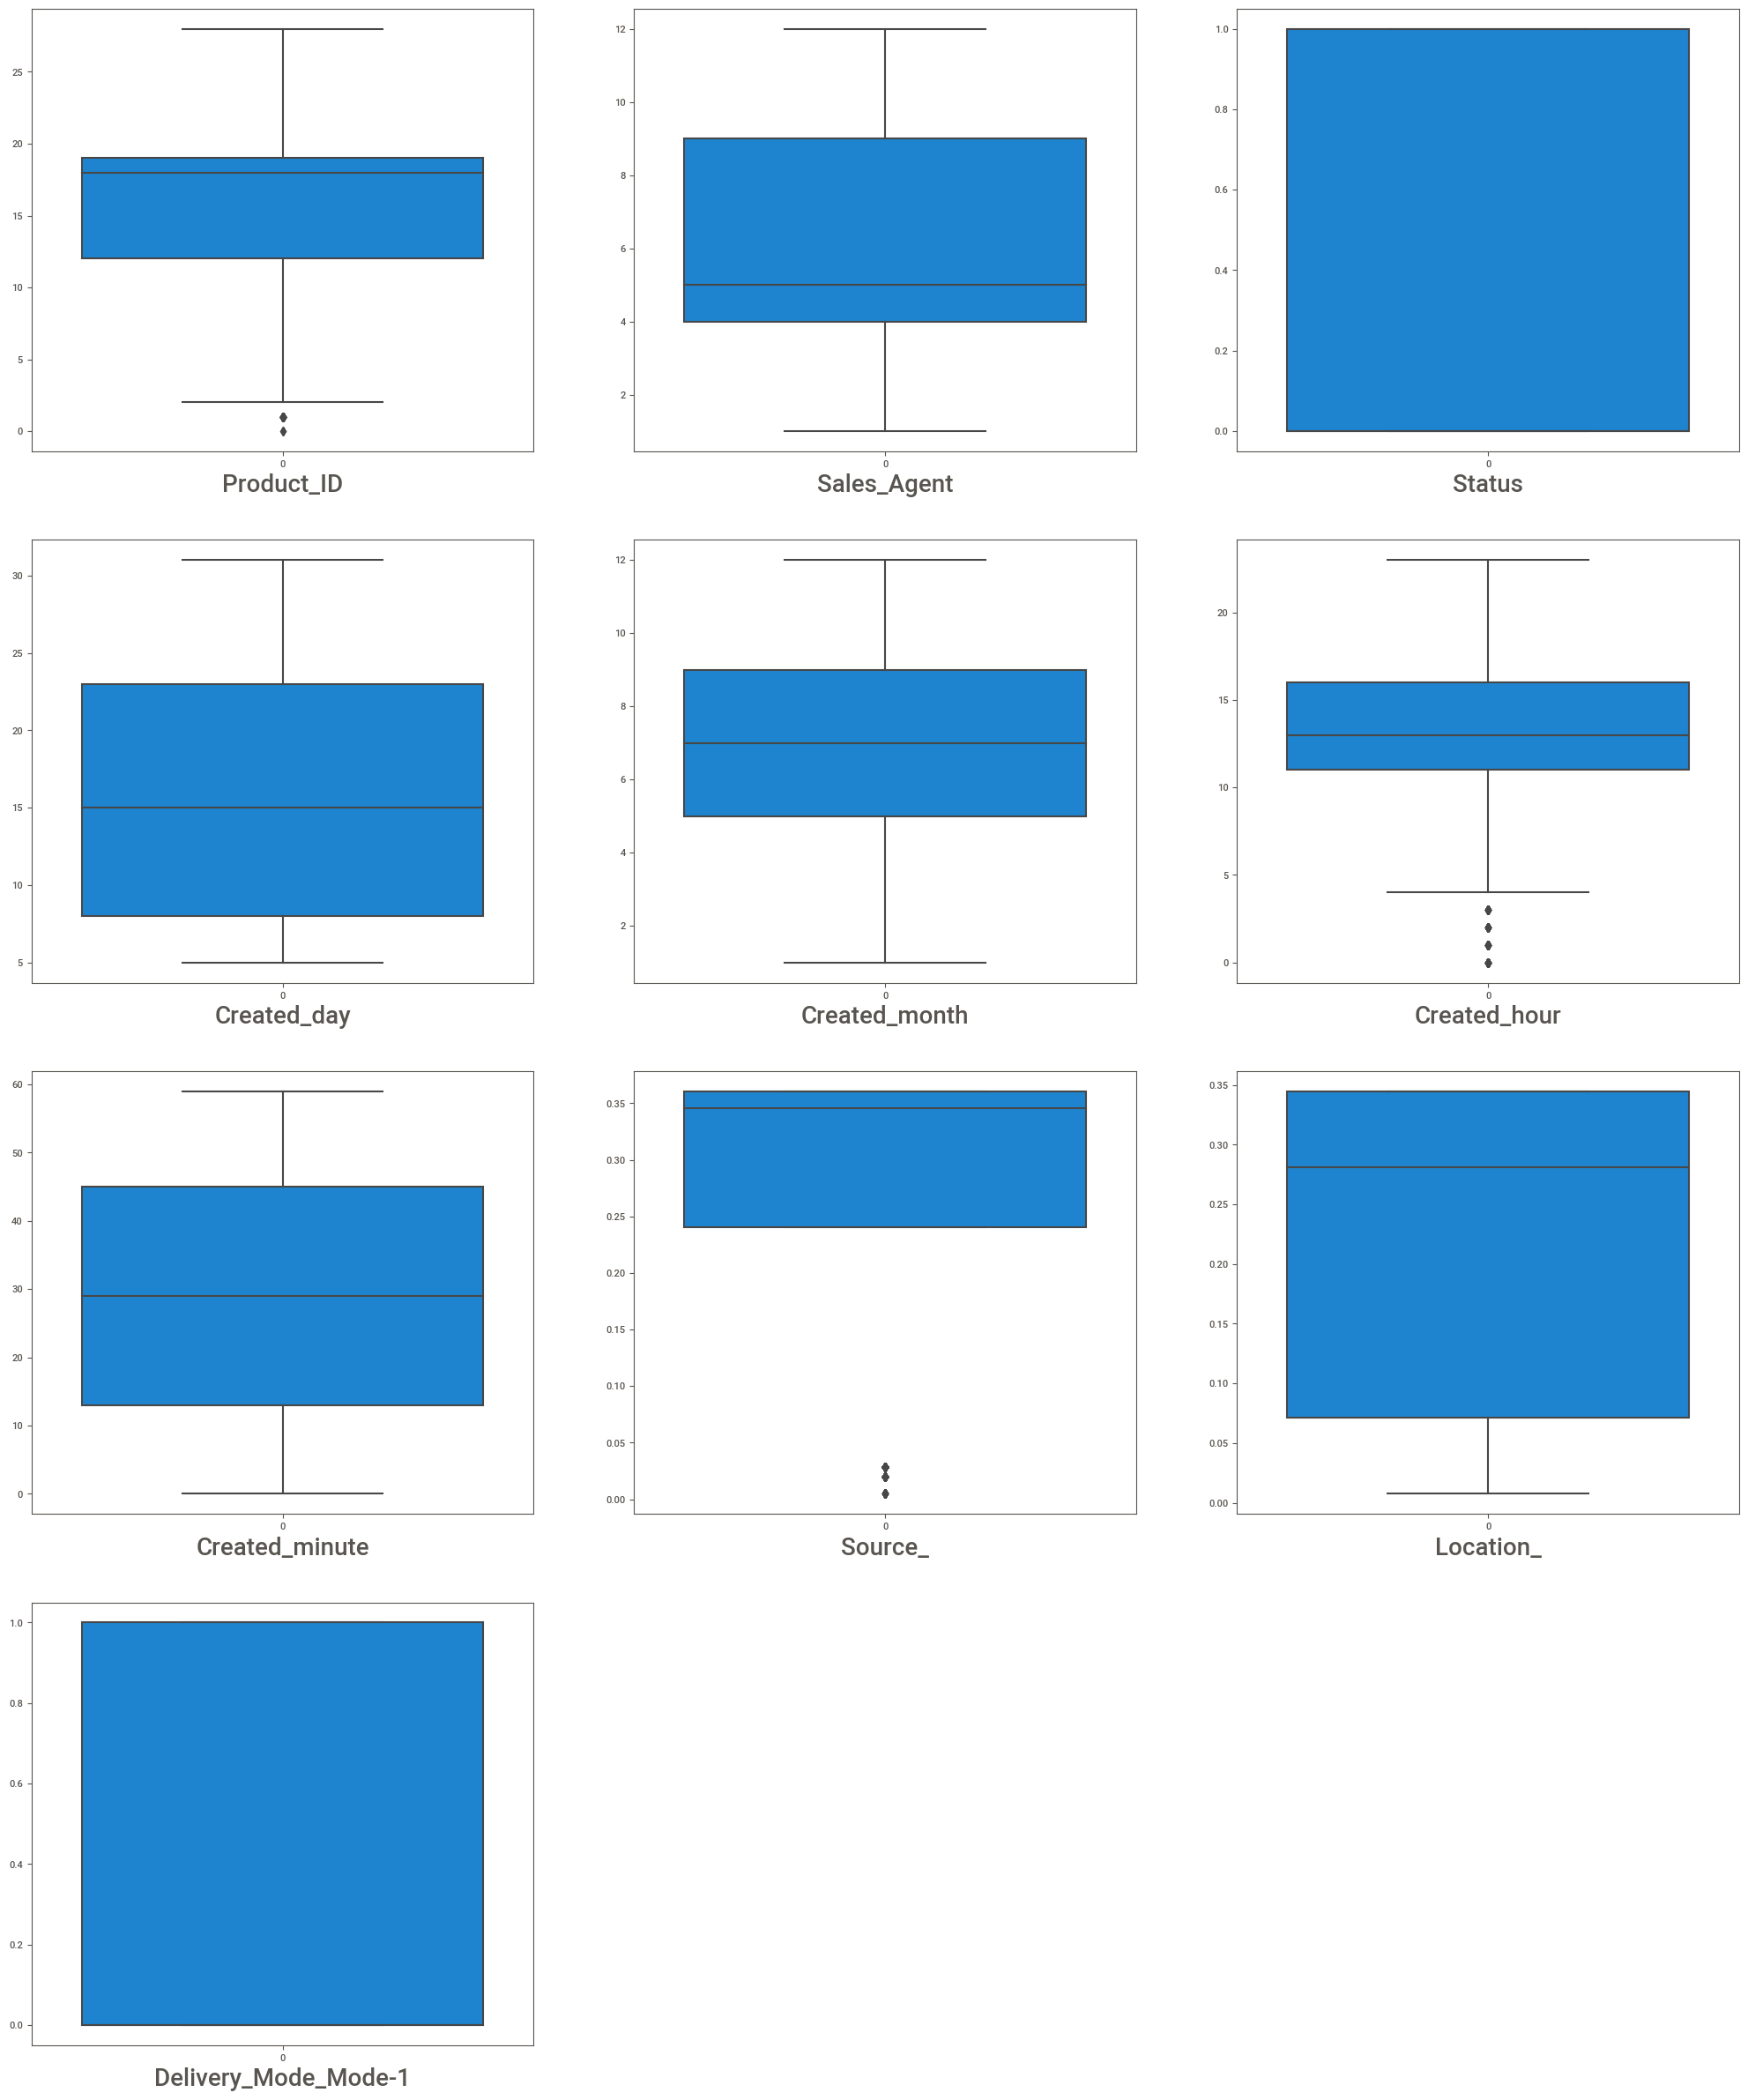

In [59]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1#counter

for column in data:#columns form data1
    if plotnumber<=10:#checking whether plot number is less or equal to 6
        ax = plt.subplot(4,3,plotnumber)# 
        sns.boxplot(data[column])# ploting boxplot fo outlier 
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()

In [60]:
Q1=data['Created_hour'].quantile(0.25)
print('Q1=',Q1)
Q3=data['Created_hour'].quantile(0.75)
print('Q3=',Q3)

Q1= 11.0
Q3= 16.0


In [61]:
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('Lower_Limit',lower_limit)
print('Upper_limit',upper_limit)

Lower_Limit 3.5
Upper_limit 23.5


In [62]:
mid=data['Created_hour'].median()
mid

13.0

In [63]:
data.loc[(data['Created_hour']<lower_limit)| (data['Created_hour']>upper_limit),"Created_hour"]=mid

In [64]:
Q1=data['Source_'].quantile(0.25)
print('Q1=',Q1)
Q3=data['Source_'].quantile(0.75)
print('Q3=',Q3)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('Lower_Limit',lower_limit)
print('Upper_limit',upper_limit)

Q1= 0.24077068175693883
Q3= 0.36068445163028834
Lower_Limit 0.06090002694691457
Upper_limit 0.5405551064403126


In [65]:
data.loc[(data['Source_']<lower_limit)| (data['Source_']>upper_limit),"Source_"]=data['Source_'].median()

#  Feature Engineering

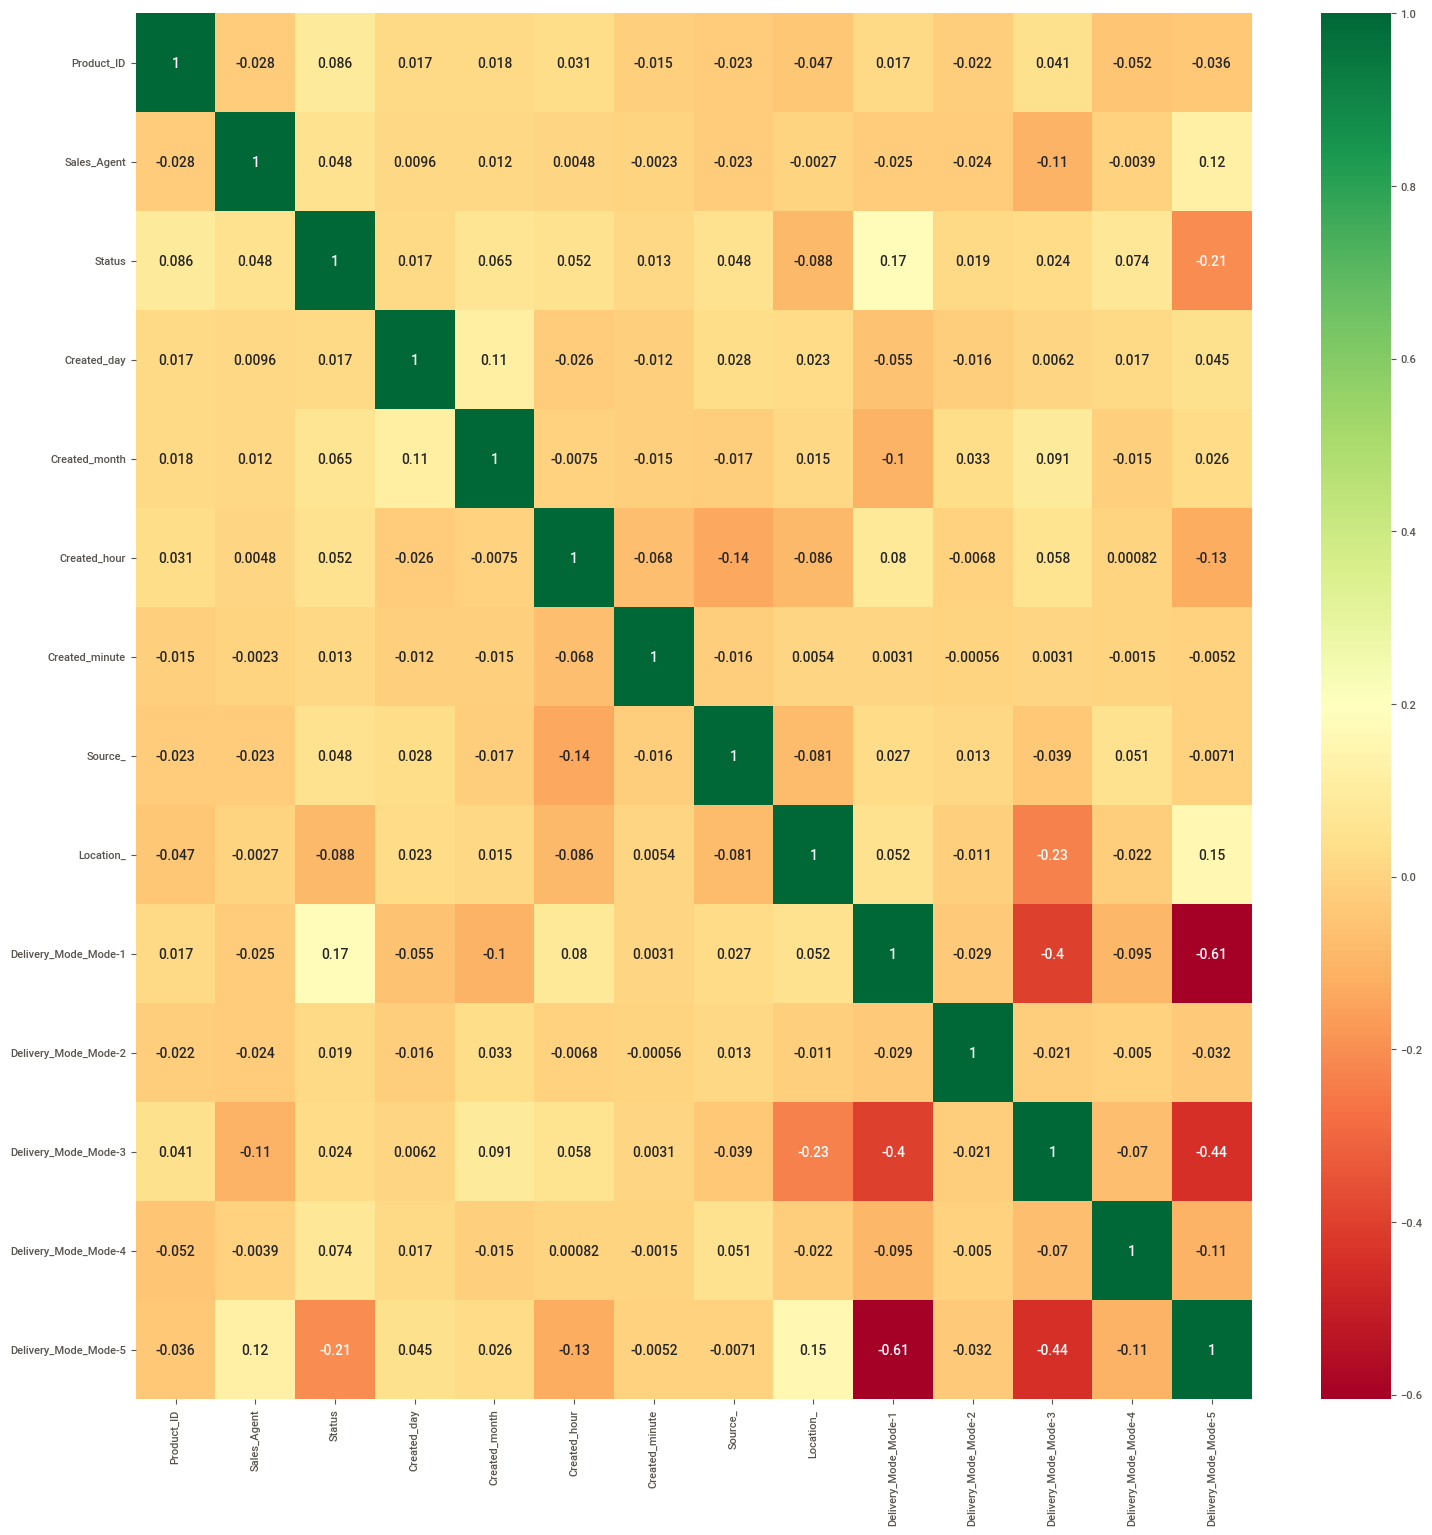

In [66]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

#### No attributes shows high correlation.

# Model Creation

In [67]:
# Creating Dependent and independent variable
x=data.drop(columns = ['Status']) ## independent varable
y=data['Status'] ## dependent or target variable

In [68]:
data['Status'].value_counts()

0    4491
1    2931
Name: Status, dtype: int64

0    4491
1    2931
Name: Status, dtype: int64

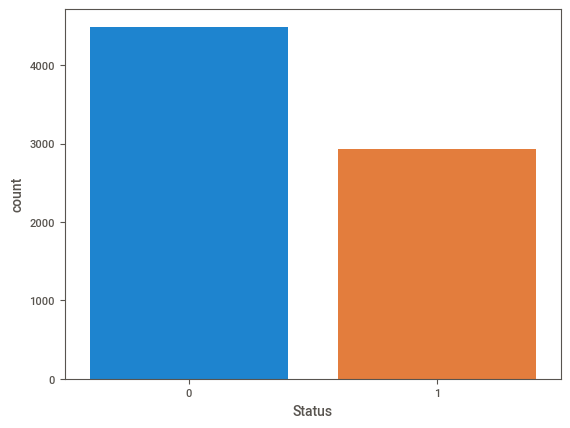

In [69]:
sns.countplot(x = "Status", data = data)
data.loc[:, 'Status'].value_counts()

## Data  is imbalanced


## Balancing the data using Smote Technique

In [70]:
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 4491, 1: 2931})
Counter({1: 4491, 0: 4491})


## Train Test Split

In [71]:
## Creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Model 1 :- Logistic Regression

In [72]:
## model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_pred = log_reg.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1111
           1       0.61      0.35      0.45       745

    accuracy                           0.65      1856
   macro avg       0.63      0.60      0.59      1856
weighted avg       0.64      0.65      0.62      1856



In [75]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6481681034482759

### Accuracy of the model is 65%

## Model 2 :- Decision Tree 

In [76]:
# Importing decision tree from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
#object creation for decision tree  
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'best')
#traning the model
dt.fit(x_train,y_train)
# prediction
y_hat = dt.predict(x_test)
# predicted value
y_hat

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.6864224137931034

In [78]:

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1111
           1       0.63      0.54      0.58       745

    accuracy                           0.69      1856
   macro avg       0.67      0.66      0.66      1856
weighted avg       0.68      0.69      0.68      1856



In [79]:
# confusion matrix
pd.crosstab(y_test,y_hat)

col_0     0    1
Status          
0       873  238
1       344  401

### Accuracy of the model is 68%

## Hyperparameter Tuning using Grid Search CV

In [80]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],  
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4] 
}

tree_clf = DecisionTreeClassifier(random_state=3)

tree_cv = GridSearchCV(estimator=tree_clf, param_grid=params, cv=5)

tree_cv.fit(x_train,y_train)

best_params = tree_cv.best_params_ 

print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


## Decision Tree  model with best hyperparameter

In [81]:
dt1=DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
dt1.fit(x_train,y_train)
y_hat1=dt1.predict(x_test)
acc2=accuracy_score(y_test,y_hat1)
print("Accuracy:",acc2*100,"%")

Accuracy: 69.77370689655173 %


### Accuracy of the model after hyperparameter tuning is 69.7%

##  Model 3 :- SVM Model

In [82]:
# support vector Classifer Model
from sklearn.svm import SVC  #SVR for regression
svclassifier=SVC() 
svclassifier.fit(x_sm,y_sm)



SVC()

In [83]:
# predict output for x_test
y_pred2=svclassifier.predict(x_test)

In [84]:
y_pred2

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [85]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1111
           1       0.53      0.65      0.58       745

    accuracy                           0.62      1856
   macro avg       0.62      0.63      0.62      1856
weighted avg       0.64      0.62      0.63      1856



In [86]:
acc=accuracy_score(y_test,y_pred2)
acc

0.6239224137931034

### Accuracy of the model is 62%

In [87]:
 # Checking Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,x,y,cv=3,scoring="roc_auc")
# 3 sets of data for training and testing
# to evaluate score we will use f1 score, we can also use accuracy 
print(scores)
# Model is good only if all scores are almost same
print("Cross validation Score:",scores.mean())
# f1 score given by model for 3 folds
print("std :",scores.std())

[0.62670889 0.64396722 0.5477786 ]
Cross validation Score: 0.6061515730198028
std : 0.04187294620339763


## Hyperparameter Tuning using Grid Search CV

In [88]:
from sklearn.model_selection import GridSearchCV
# define  parameter range
param_grid={"C":[0.1,5,10,50,60,70],
           "gamma":[1,0.1,0.01,0.001,0.0001]}
model=SVC()
grid=GridSearchCV(model,param_grid,refit=True,verbose=2,scoring="f1",cv=5)
# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.7s
[CV] END .....................................C=0.1, gamma=1; total time=   2.8s
[CV] END .....................................C=0.1, gamma=1; total time=   2.8s
[CV] END .....................................C=0.1, gamma=1; total time=   2.8s
[CV] END .....................................C=0.1, gamma=1; total time=   2.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.4s
[CV] END ..................................C=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=2)

## SVC model with best hyperparameter

In [89]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 70, 'gamma': 0.01}


In [90]:
clf=SVC(C=70,gamma=0.01)

In [91]:
clf.fit(x_sm,y_sm)

SVC(C=70, gamma=0.01)

In [92]:
y_pred_hyp=clf.predict(x_test) # after tuning y_pred

In [93]:
print(classification_report(y_test,y_pred_hyp))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1111
           1       0.81      0.86      0.84       745

    accuracy                           0.86      1856
   macro avg       0.86      0.86      0.86      1856
weighted avg       0.87      0.86      0.86      1856



In [94]:
acc=accuracy_score(y_test,y_pred_hyp)
acc

0.8642241379310345

### Accuracy of the model after Hyperparameter tuning is 86.4%

## Model 4:- Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
y_pred3=rf_clf.predict(x_test)

In [97]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1111
           1       0.69      0.52      0.60       745

    accuracy                           0.71      1856
   macro avg       0.71      0.68      0.69      1856
weighted avg       0.71      0.71      0.71      1856



In [98]:
print(accuracy_score(y_test,y_pred3))

0.7144396551724138


### Accuracy of the model is 71%

## Hyperparameter Tuning using Randomized Search CV

In [99]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#it takes 10 numbers between 200 to 2000 in equal diff
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] # it takes 11 numbers between 10 to 110 in equal size
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [100]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
rf_clf1 = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True})


## Random Forest Model with best hyperparameter

In [101]:
rf_clf2 = RandomForestClassifier(**rf_best_params)  # fitting random forest model with best parameters
rf_clf2.fit(x_train, y_train)
y_predict=rf_clf2.predict(x_test)

In [102]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1111
           1       0.69      0.53      0.60       745

    accuracy                           0.71      1856
   macro avg       0.71      0.68      0.69      1856
weighted avg       0.71      0.71      0.71      1856



In [103]:
print(accuracy_score(y_test,y_predict))

0.7144396551724138


### Accuracy of the model is 72%

## Model 5 :- GradientBoostingClassifier

In [104]:

from sklearn.ensemble import GradientBoostingClassifier
gbcls=GradientBoostingClassifier() ## object creation
gbcls.fit(x_train,y_train) ## fitting the data
y_pred_gb=gbcls.predict(x_test)#predicting 

In [105]:
y_pred_gb

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [106]:
acc=accuracy_score(y_test,y_pred_gb)
acc

0.7214439655172413

### Accuracy of the model is 72%

## Model 6 :- XGBoost

In [107]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_c=XGBClassifier() ## object creation
xgb_c.fit(x_train,y_train)# fitting the data
y_hat=xgb_c.predict(x_test)#predicting 

In [108]:
y_hat

array([1, 0, 1, ..., 0, 0, 0])

In [109]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1111
           1       0.64      0.56      0.60       745

    accuracy                           0.70      1856
   macro avg       0.69      0.68      0.68      1856
weighted avg       0.69      0.70      0.69      1856



In [110]:
acc=accuracy_score(y_test,y_hat)
acc

0.6982758620689655

### Accuracy of the model is 70%

## Hyperparameter Tuning using Randomized Search CV

In [111]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have your X_train, y_train, and other required data prepared

# Define the hyperparameter grid
max_depth = [3, 4, 5]
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [100, 200, 300]
verbosity = [0, 1, 2]
silent = [0]  # assuming you want it to be 0
objective = ['reg:linear']
gamma = [0]
min_child_weight = [1, 2, 3]
subsample = [0.5, 0.7, 1]
colsample_bytree = [0.5, 0.7, 1]

params = {
    'max_depth': max_depth, 'learning_rate': learning_rate, 'n_estimators': n_estimators,
    'verbosity': verbosity, 'silent': silent, 'objective': objective, 'gamma': gamma,
    'min_child_weight': min_child_weight, 'subsample': subsample, 'colsample_bytree': colsample_bytree
}

# Create XGBClassifier
XGB = XGBClassifier(random_state=42)

# Create RandomizedSearchCV object
rcv = RandomizedSearchCV(
    estimator=XGB, 
    scoring='f1', 
    param_distributions=params, 
    n_iter=100, 
    cv=3,
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the model on training data using RandomizedSearchCV
rcv.fit(x_train, y_train)

# Get the best parameters
cv_best_params = rcv.best_params_
print(f"Best parameters: {cv_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'verbosity': 0, 'subsample': 0.7, 'silent': 0, 'objective': 'reg:linear', 'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


## XGBoost with best hyperparameter

In [112]:
best_params = rcv.best_params_

# Create XGBClassifier with the best parameters
XGB2 = XGBClassifier(**best_params)

# Fit the model on the training data
XGB2.fit(x_train, y_train)

# Make predictions on the test data
y_predict = XGB2.predict(x_test)

In [113]:
y_predict

array([1, 0, 1, ..., 0, 0, 0])

In [114]:
acc=accuracy_score(y_test,y_predict)
acc

0.7106681034482759

### Accuracy of the model after hyperparameter tuning is 71%

## Model 7 :- KNN model

In [115]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=15)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [116]:
# model Evaluation
y_predict=model.predict(x_test)


In [117]:
print(accuracy_score(y_test,y_predict))

0.6255387931034483


In [118]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1111
           1       0.54      0.41      0.47       745

    accuracy                           0.63      1856
   macro avg       0.60      0.59      0.59      1856
weighted avg       0.61      0.63      0.61      1856



### Accuracy of the model is 63%

# Model Comparison Report

- Logistic Regression :- 65%
- Decision Tree Classifier :- 68 %
- Decision Tree with best hyperparameter :- 69.7%
- Support Vector Machine  :- 62%
- Support Vector Machine with best hyperparameter :- **87%**
- Random Forest Classifier :- 71%
- Random Forest with best hyperparameter :- 72%
- Gradient Boosting :- 72%
- XGBoost :- 70%
- XGBoost with best hyperparameter :- 71%
- K-Nearest Neighbor :- 63%
















##### The best accuracy is given by the Support Vector Machine with best hyperparameter- 87%.

# Predict

In [119]:
data.columns

Index(['Product_ID', 'Sales_Agent', 'Status', 'Created_day', 'Created_month',
       'Created_hour', 'Created_minute', 'Source_', 'Location_',
       'Delivery_Mode_Mode-1', 'Delivery_Mode_Mode-2', 'Delivery_Mode_Mode-3',
       'Delivery_Mode_Mode-4', 'Delivery_Mode_Mode-5'],
      dtype='object')

#  Predicting  the Lead Category (High Potential , Low Potential) using SVM

In [121]:
i = []
object_attributes = ['Product_ID', 'Sales_Agent', 'Created_day', 'Created_month',
       'Created_hour', 'Created_minute', 'Source_', 'Location_',
       'Delivery_Mode_Mode-1', 'Delivery_Mode_Mode-2', 'Delivery_Mode_Mode-3',
       'Delivery_Mode_Mode-4', 'Delivery_Mode_Mode-5']


# Note 
**For Source:**
* Source  ->       Enter this value
* Call   ->               0.345459
* Campaign   ->             0.004850
* Customer Referral  ->     0.028564
* Existing Customer  ->     0.019671
* Live Chat    ->           0.360684
* Website    ->             0.240771


**For Locations:**
* Location    ->      Enter this Value
* Bangalore     ->       0.280787
* Chennai       ->       0.122474
* Delhi         ->       0.063460
* Foreign_Locations ->   0.028833
* Hyderabad        ->    0.071140
* Kolkata         ->     0.007545
* Mumbai        ->       0.054163
* Other Locations ->     0.344651
* Pune           ->      0.019132
* Trivandrum      ->     0.007815

In [122]:
for x in object_attributes:
    value = input(f"Enter value for {x}: ")
    i.append(float(value))  # Convert input to float if necessary


if len(i) == 0:
    raise ValueError("No input values collected.")

# Reshape input array
i_reshaped = np.array(i).reshape(1, -1)

#prediction
prediction = clf.predict(i_reshaped)
if (prediction==1):
    print("The lead is High Potential")
else:
    print("The lead is Low Potebtial")

Enter value for Product_ID: 25
Enter value for Sales_Agent: 3
Enter value for Created_day: 28
Enter value for Created_month: 4
Enter value for Created_hour: 7
Enter value for Created_minute: 54
Enter value for Source_: 0.240771
Enter value for Location_: 0.122474
Enter value for Delivery_Mode_Mode-1: 1
Enter value for Delivery_Mode_Mode-2: 0
Enter value for Delivery_Mode_Mode-3: 0
Enter value for Delivery_Mode_Mode-4: 0
Enter value for Delivery_Mode_Mode-5: 0
The lead is High Potential


### Model accurately predicted the lead.

# Conclusion

The dataset contained 7421 Rows and 9 Columns. All of the data's are in object datatype.From the exploratory analysis of the data it is seen that Product 18 is mostly seen but it doesn't show a great potential while Product 19 is least in number but it shows high potential leads and product 15 has the highest value in low potential which mean it faces challenges.While checking the Source Live chat,Call,Website shows high potential aswell as low potential leads also . But customer referalls and Existing customer shows bit better outcomes.Comparing other states in India Bangalore and Chennai are better and outiside India Malaysia and Singapore shows better leads.
For model creation we had used 7 models from that Support Vector Machine Algorithm shows the highest accuracy of 87%.

# Suggestion
- Concentrate on those product which gives great impact.
- Check the challenges faced by the most frequent product.
- Take the feedback from the users and utilize it for future purchases.
- Expand the accessibility of the product by increasing the locations.
- Find the challenges faced by the Sales Agents who are having less leads.
- Expand the Delivert mode services.
- Make the enviroment of the company healthy. 

# Risks
- High computational time.
- Low scores in some models.
- Unbalanced data.

                                                 THANK YOU